In [57]:
import numpy as np #
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import nest_asyncio
from scipy import stats

In [2]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/rawBehAll.csv')

In [17]:
actPropopr_ActCond = np.zeros((len(subList), 2, 5), dtype=float) # number of subjects* 2 sessions* 10 phases for 2 runs and two conditions in each session
clrPropopr_ActCond = np.zeros((len(subList), 2, 5), dtype=float) # number of subjects* 2 sessions* 10 phases for 2 runs and two conditions in each session
clrPropor_ClrtCond = np.zeros((len(subList), 2, 5), dtype=float) # number of subjects* 2 sessions* 10 phases for 2 runs and two conditions in each session
actPropor_ClrCond = np.zeros((len(subList), 2, 5), dtype=float) # number of subjects* 2 sessions* 10 phases for 2 runs and two conditions in each session

# loop over all participants, run,
for i, subName in enumerate(subList):
    for sess in range(2):
        j = 0
        k=0
        for run in range(2):
            for cond in ['Stim', 'Act']:
                if cond=='Act':
                    # take data from specific session, run for a subject
                    actData = behAll[(behAll['session']==sess+1) & (behAll['run']==run+1) & (behAll['block']==cond) & (behAll['sub_ID']==subName)]
                    # if the reversal point is 21
                    if actData['reverse'].unique()==21:
                        # Phase 1
                        actPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase1']['pushCorrect'].mean()
                        clrPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase1']['yellowCorrect'].mean()
                        j +=1
                        
                        # Phase 2
                        actPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase2']['pushCorrect'].mean()
                        clrPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase2']['yellowCorrect'].mean()
                        j +=1
                    # if the reversal point is 14
                    elif actData['reverse'].unique()==14:
                        
                        # Phase 1
                        actPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase1']['pushCorrect'].mean()
                        clrPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase1']['yellowCorrect'].mean()
                        j +=1
                        
                        # Phase 2
                        actPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase2']['pushCorrect'].mean()
                        clrPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase2']['yellowCorrect'].mean()
                        j +=1
                        
                        # Phase 3
                        actPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase3']['pushCorrect'].mean()
                        clrPropopr_ActCond[i, sess, j] = actData[actData['phase']=='phase3']['yellowCorrect'].mean()
                        j +=1
                elif cond=='Stim':
                    # take data from specific session, run for a subject
                    clrData = behAll[(behAll['session']==sess+1) & (behAll['run']==run+1) & (behAll['block']==cond) & (behAll['sub_ID']==subName)]
                    # if the reversal point is 21
                    if clrData['reverse'].unique()==21:
                        
                        # Phase 1
                        clrPropor_ClrtCond[i, sess, k] = clrData[clrData['phase']=='phase1']['yellowCorrect'].mean()
                        actPropor_ClrCond[i, sess, k] = clrData[clrData['phase']=='phase1']['pushCorrect'].mean()
                        k +=1
                        
                        # Phase 2
                        clrPropor_ClrtCond[i, sess, k] = clrData[clrData['phase']=='phase2']['yellowCorrect'].mean()
                        actPropor_ClrCond[i, sess, k] = clrData[clrData['phase']=='phase2']['pushCorrect'].mean()
                        k +=1
                    # if the reversal point is 14
                    elif clrData['reverse'].unique()==14:
                        
                        # Phase 1
                        clrPropor_ClrtCond[i, sess, k] = clrData[clrData['phase']=='phase1']['yellowCorrect'].mean()
                        actPropor_ClrCond[i, sess, k] = clrData[clrData['phase']=='phase1']['pushCorrect'].mean()
                        k +=1
                        
                        # Phase 2
                        clrPropor_ClrtCond[i, sess, k] = clrData[clrData['phase']=='phase2']['yellowCorrect'].mean()
                        actPropor_ClrCond[i, sess, k] = clrData[clrData['phase']=='phase2']['pushCorrect'].mean()
                        k +=1
                        
                        # Phase 3
                        clrPropor_ClrtCond[i, sess, k] = clrData[clrData['phase']=='phase3']['yellowCorrect'].mean()
                        actPropor_ClrCond[i, sess, k] = clrData[clrData['phase']=='phase3']['pushCorrect'].mean()
                        k +=1

# convert to proportion
actPropopr_ActCond[actPropopr_ActCond<.5] = 1-actPropopr_ActCond[actPropopr_ActCond<.5] 
clrPropopr_ActCond[clrPropopr_ActCond<.5] = 1-clrPropopr_ActCond[clrPropopr_ActCond<.5] 
clrPropor_ClrtCond[clrPropor_ClrtCond<.5] = 1-clrPropor_ClrtCond[clrPropor_ClrtCond<.5] 
actPropor_ClrCond[actPropor_ClrCond<.5] = 1-actPropor_ClrCond[actPropor_ClrCond<.5] 
# an exception in data
actPropopr_ActCond[actPropopr_ActCond==1]=0.66666667

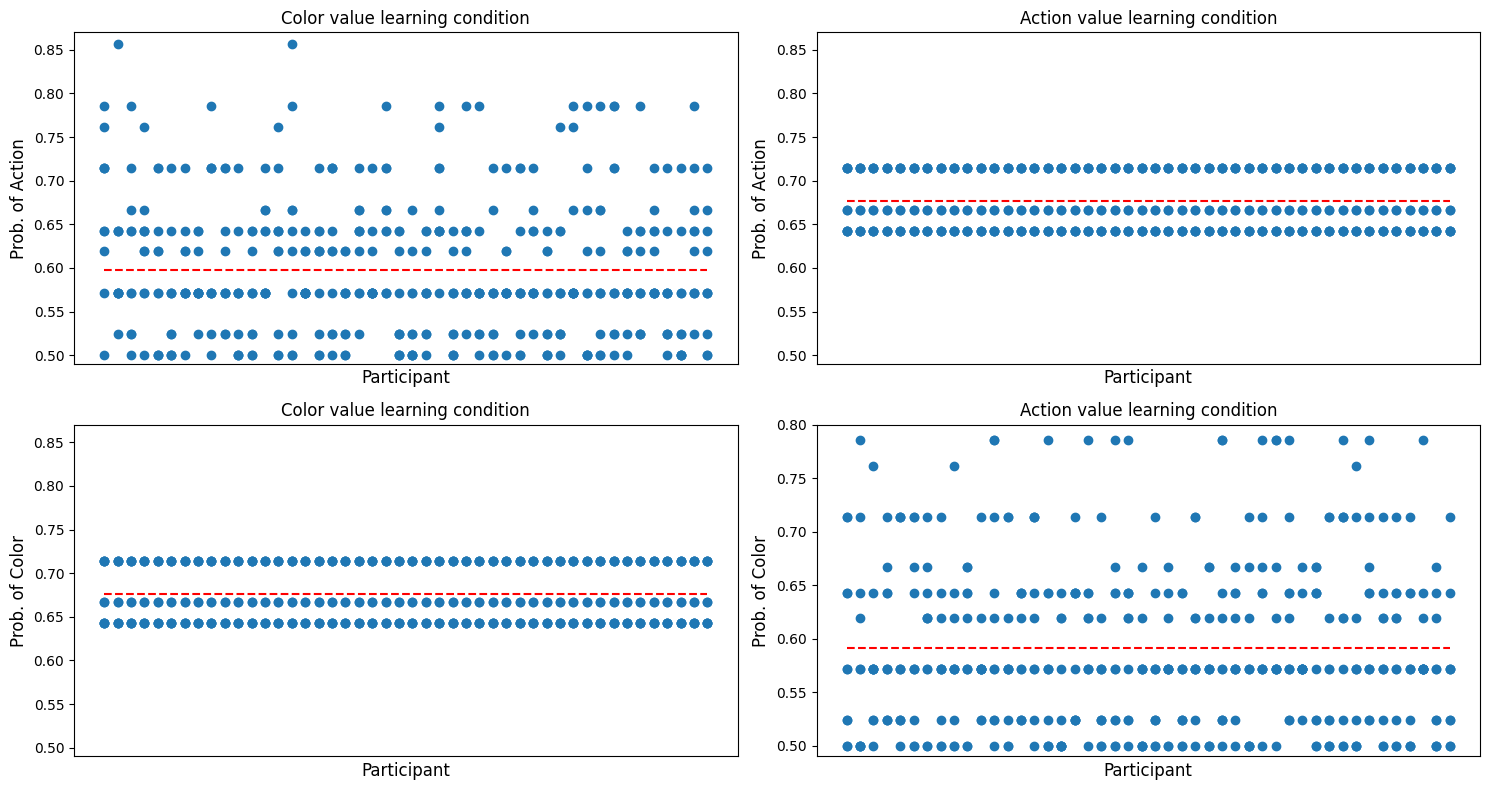

In [180]:
# plot
fig, axes = plt.subplots(2, 2, figsize=(15,8))
axes=axes.flatten()
axes[0].scatter(np.repeat(np.linspace(0, 1, 46), 10), actPropor_ClrCond.flatten())
axes[0].set_xlabel('Participant', fontsize=12)
axes[0].set_title('Color value learning condition', fontsize=12)
axes[0].set_ylabel('Prob. of Action', fontsize=12)
axes[0].set_xticks([])
axes[0].hlines(actPropor_ClrCond.mean(), xmin=0, xmax=1, color='red', linestyle='--')
axes[0].set_ylim(.49, .87)

axes[3].scatter(np.repeat(np.linspace(0, 1, 46), 10), clrPropopr_ActCond.flatten())
axes[3].set_xlabel('Participant', fontsize=12)
axes[3].set_title('Action value learning condition', fontsize=12)
axes[3].set_ylabel('Prob. of Color', fontsize=12)
axes[3].set_xticks([])
axes[3].hlines(clrPropopr_ActCond.mean(), xmin=0, xmax=1, color='red', linestyle='--')
axes[3].set_ylim(.49, .8)

axes[1].scatter(np.repeat(np.linspace(0, 1, 46), 10), actPropopr_ActCond.flatten())
axes[1].set_xlabel('Participant', fontsize=12)
axes[1].set_title('Action value learning condition', fontsize=12)
axes[1].set_ylabel('Prob. of Action', fontsize=12)
axes[1].set_xticks([])
axes[1].hlines(actPropopr_ActCond.mean(), xmin=0, xmax=1, color='red', linestyle='--')
axes[1].set_ylim(.49, .87)

axes[2].scatter(np.repeat(np.linspace(0, 1, 46), 10), clrPropor_ClrtCond.flatten())
axes[2].set_xlabel('Participant', fontsize=12)
axes[2].set_title('Color value learning condition', fontsize=12)
axes[2].set_ylabel('Prob. of Color', fontsize=12)
axes[2].set_xticks([])
axes[2].hlines(clrPropor_ClrtCond.mean(), xmin=0, xmax=1, color='red', linestyle='--')
axes[2].set_ylim(.49, .87)

fig.tight_layout()

fig.savefig('/mrhome/amingk/Documents/7TPD/figures/proportion_ActClr.png', dpi=300)

In [35]:
firstAct_file = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_ActFirst_winOnly.mat'
firstStim_file = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/predefined-task-values/ExpStruct_StimFirst_winOnly.mat'
firstAct_data = loadmat(firstAct_file)
firstStim_data = loadmat(firstStim_file)

In [33]:
firstAct_data['AmtList1_1']

array([[36,  6,  8, 15, 29, 85, 68, 80, 22, 56, 90, 82, 78, 41, 87, 39,
        27, 75, 54, 18, 94, 44,  1, 73, 25, 61, 46,  3, 66, 64, 52, 13,
        32, 92, 20, 10, 97, 34, 59, 99, 48, 71]])

In [34]:
firstAct_data['AmtList1_2']

array([[56, 27, 32,  6, 48, 94, 73, 18, 90, 68, 87, 39, 52,  3, 20, 99,
        41, 34,  1, 10, 25, 66, 15, 13, 59, 85, 75, 29, 92, 61,  8, 82,
        78, 97, 54, 71, 22, 80, 36, 44, 64, 46]])

In [38]:
firstStim_data['AmtList1_1']

array([[82, 22, 73, 29, 99, 39, 27,  3, 92, 61, 54, 85, 75, 32, 44, 94,
        20,  1, 66, 59, 64, 71, 41, 10, 15, 46, 36, 25, 97, 34, 48, 18,
        78, 80, 68, 52, 87,  6, 13,  8, 56, 90]])

In [245]:
np.random.beta()

Docstring:
beta(a, b, size=None)

Draw samples from a Beta distribution.

The Beta distribution is a special case of the Dirichlet distribution,
and is related to the Gamma distribution.  It has the probability
distribution function

.. math:: f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                 (1 - x)^{\beta - 1},

where the normalization, B, is the beta function,

.. math:: B(\alpha, \beta) = \int_0^1 t^{\alpha - 1}
                             (1 - t)^{\beta - 1} dt.

It is often seen in Bayesian inference and order statistics.

.. note::
    New code should use the `~numpy.random.Generator.beta`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.


Parameters
----------
a : float or array_like of floats
    Alpha, positive (>0).
b : float or array_like of floats
    Beta, positive (>0).
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n

(array([0.12480907, 0.04160302, 0.16641209, 0.16641209, 0.12480907,
        0.24961813, 0.29122116, 0.16641209, 0.49923627, 0.83206044,
        0.95686951, 1.53931182, 1.41450276, 1.95534205, 2.66259342,
        3.70266898, 4.61793547, 5.32518685, 6.94770472, 9.81831325]),
 array([0.51910874, 0.54314546, 0.56718217, 0.59121889, 0.61525561,
        0.63929232, 0.66332904, 0.68736575, 0.71140247, 0.73543918,
        0.7594759 , 0.78351261, 0.80754933, 0.83158604, 0.85562276,
        0.87965947, 0.90369619, 0.9277329 , 0.95176962, 0.97580633,
        0.99984305]),
 <BarContainer object of 20 artists>)

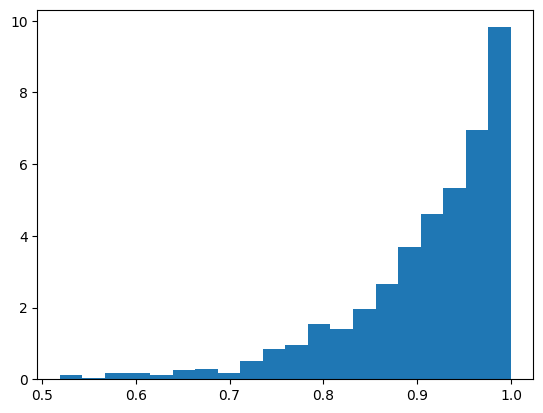

In [230]:
plt.hist(np.random.beta(10, 1, 1000), density=True, bins=20)

(array([14.93616956,  1.3578336 ,  0.63777033,  0.51433091,  0.30859854,
         0.34974502,  0.28802531,  0.34974502,  0.18515913,  0.20573236,
         0.14401265,  0.39089149,  0.18515913,  0.14401265,  0.06171971,
         0.06171971,  0.12343942,  0.02057324,  0.10286618,  0.20573236]),
 array([9.68365807e-28, 4.86068397e-02, 9.72136794e-02, 1.45820519e-01,
        1.94427359e-01, 2.43034199e-01, 2.91641038e-01, 3.40247878e-01,
        3.88854718e-01, 4.37461557e-01, 4.86068397e-01, 5.34675237e-01,
        5.83282077e-01, 6.31888916e-01, 6.80495756e-01, 7.29102596e-01,
        7.77709436e-01, 8.26316275e-01, 8.74923115e-01, 9.23529955e-01,
        9.72136794e-01]),
 <BarContainer object of 20 artists>)

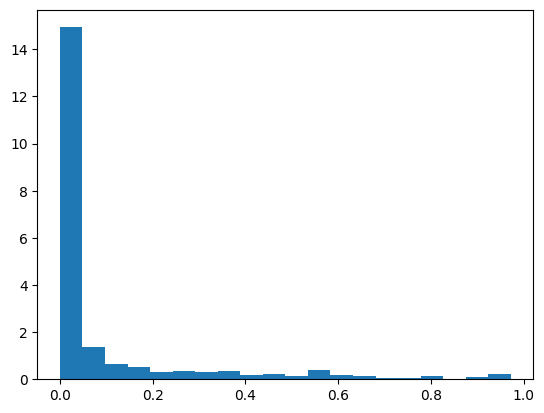

In [234]:
plt.hist(np.random.beta(.1, 1, 1000), density=True, bins=20)

In [296]:
cauchy_a

array([1.26516867e+02, 2.70085945e+00, 3.80680199e-01, 2.78108960e+00,
       4.55971353e+00, 7.52051036e+00, 4.07956812e+00, 2.36741067e+00,
       1.38536732e+01, 6.65491981e+00, 6.63042725e-01, 2.59196618e+01,
       8.20805100e-02, 2.93499840e+00, 4.46082056e+00, 6.28218620e+01,
       9.75315210e+00, 5.68893609e+00, 1.19107751e+00, 2.97864040e+01,
       1.45526113e+01, 4.74185187e-01, 1.57247764e-01, 3.64775267e+00,
       5.24458709e+00, 2.97382456e+00, 3.83604779e+00, 5.52190968e+00,
       7.12753803e-01, 2.03245132e+01, 4.79118020e+01, 6.27682778e+00,
       4.99384958e+00, 6.41034259e+00, 1.67924786e+01, 9.30880019e+00,
       2.19813912e+01, 3.50166566e+00, 1.48779130e+02, 4.12613745e+01,
       1.37416045e+00, 2.87226525e+00, 3.69149677e+00, 1.86976841e+00,
       4.83460338e+00, 5.66881623e+00, 5.01150928e+00, 5.53636208e+00,
       2.43066654e+00, 1.13647440e+00, 1.01632994e+00, 4.29060284e+00,
       6.41014020e+01, 2.14107149e+02, 1.91397567e+01, 1.03111006e+00,
      

(array([2.76, 1.72, 1.59, 1.4 , 1.49, 1.37, 1.18, 1.28, 1.05, 1.23, 1.03,
        1.12, 0.95, 1.01, 0.98, 1.03, 0.86, 0.99, 0.93, 0.88, 0.84, 0.9 ,
        0.79, 0.88, 0.72, 0.88, 0.86, 0.97, 0.79, 0.87, 0.92, 0.65, 0.7 ,
        1.05, 0.86, 0.87, 0.98, 0.75, 0.86, 0.73, 0.59, 0.82, 0.83, 0.67,
        0.84, 0.91, 0.83, 0.89, 0.78, 0.9 , 0.78, 0.73, 0.75, 0.87, 0.85,
        0.99, 0.87, 0.96, 0.85, 0.87, 0.74, 0.78, 0.75, 0.79, 0.78, 0.77,
        0.7 , 0.86, 0.8 , 0.82, 0.93, 0.81, 0.9 , 0.9 , 0.88, 1.02, 0.89,
        0.77, 0.9 , 0.89, 0.89, 0.96, 1.  , 1.18, 0.89, 0.97, 1.28, 0.92,
        1.09, 1.14, 0.99, 1.16, 1.03, 1.32, 1.32, 1.43, 1.4 , 1.49, 1.74,
        2.82]),
 array([1.9996533e-16, 1.0000000e-02, 2.0000000e-02, 3.0000000e-02,
        4.0000000e-02, 5.0000000e-02, 6.0000000e-02, 7.0000000e-02,
        8.0000000e-02, 9.0000000e-02, 1.0000000e-01, 1.1000000e-01,
        1.2000000e-01, 1.3000000e-01, 1.4000000e-01, 1.5000000e-01,
        1.6000000e-01, 1.7000000e-01, 1.800000

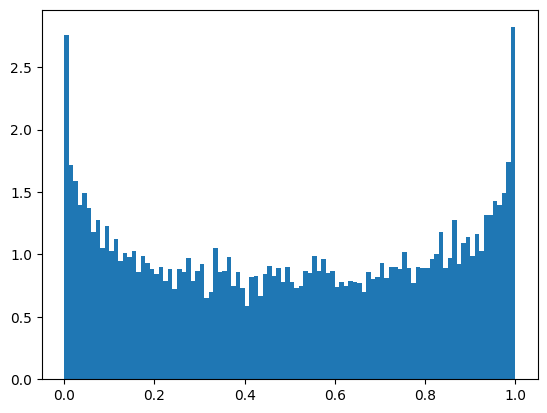

In [462]:
from scipy import stats
cauchy_a =np.zeros(10000)
cauchy_b =np.zeros(10000)
i=0
while True:
    if i>=10000:
        break
    rng = stats.cauchy.rvs(loc=0, scale=100)
    if rng>=0:
        cauchy_a[i]= rng
        i +=1
i=0
while True:
    if i>=10000:
        break
    rng = stats.cauchy.rvs(loc=0, scale=100)
    if rng>=0:
        cauchy_b[i]= rng
        i +=1

beta = np.random.beta(cauchy_a, cauchy_b)
plt.hist(beta, density=True, bins=100)


In [372]:
np.random.normal(size=10)

array([-0.20571388, -0.03519495, -0.23786463, -0.49569195,  2.24732929,
       -0.83656094,  0.81240117, -1.36595073, -0.95756098, -0.68233466])

In [373]:
np.random.normal(size=10)

array([ 1.92103319, -0.99255693,  0.28175413, -0.21562842, -1.38258672,
       -0.89148845, -0.39646701, -1.08674675, -0.03459667, -0.40047382])

(array([10.22,  2.89,  2.27,  2.23,  1.93,  1.76,  1.86,  1.52,  1.9 ,
         1.48,  1.8 ,  1.61,  1.64,  1.63,  1.43,  1.38,  1.25,  1.31,
         1.44,  1.4 ,  1.4 ,  1.64,  1.55,  1.15,  1.32,  1.42,  1.3 ,
         1.27,  1.36,  1.37,  1.23,  1.46,  1.18,  1.19,  1.2 ,  1.21,
         1.22,  0.96,  1.2 ,  1.01,  1.05,  1.02,  0.96,  0.99,  1.02,
         1.15,  0.95,  0.9 ,  0.82,  1.06,  0.8 ,  0.98,  0.88,  0.81,
         0.79,  0.98,  0.81,  0.56,  0.6 ,  0.63,  0.66,  0.56,  0.58,
         0.6 ,  0.57,  0.54,  0.68,  0.57,  0.51,  0.51,  0.58,  0.4 ,
         0.41,  0.47,  0.35,  0.33,  0.42,  0.42,  0.39,  0.38,  0.32,
         0.27,  0.26,  0.21,  0.26,  0.23,  0.25,  0.2 ,  0.14,  0.12,
         0.12,  0.13,  0.18,  0.15,  0.14,  0.15,  0.1 ,  0.09,  0.12,
         0.28]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

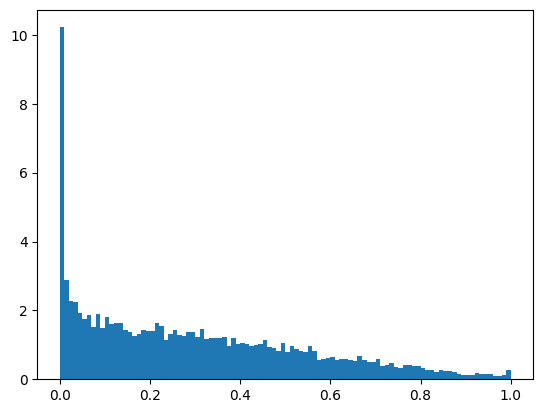

In [471]:
from scipy import stats
norm_a =np.zeros(10000)
norm_b =np.zeros(10000)
i=0
while True:
    if i>=10000:
        break
    rng = np.random.normal(3, 1)
    if rng>=0:
        norm_a[i]= rng
        i +=1
i=0
while True:
    if i>=10000:
        break
    rng = np.random.normal(3, 1)
    if rng>=0:
        norm_b[i]= rng
        i +=1

plt.hist(np.random.beta(norm_a, norm_b), density=True, bins=100)

In [367]:
rng2/rng2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

/tmp/ipykernel_564981/2789168482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hier_alphaAct_a)


<Axes: ylabel='Density'>

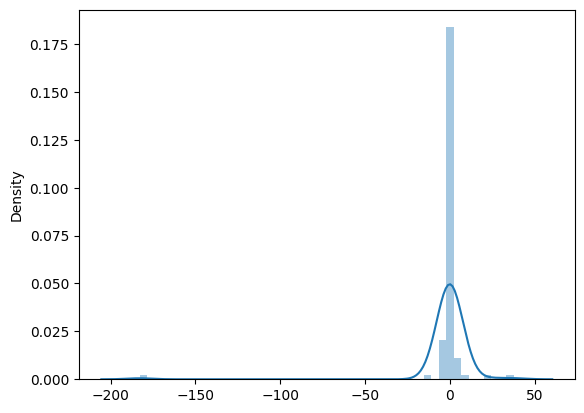

In [290]:
cauchy = stats.cauchy.rvs(0, 5, size=10000)
sns.distplot(cauchy)
plt.xlim(-1000, 1000)

In [476]:
from scipy import stats
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
reverse = 21
sub='sub-026'
result = stats.spearmanr(behAll[(behAll['sub_ID']==sub) &(behAll['session']==1) & (behAll['reverse']==reverse) & (behAll['block']=='Stim') ]['yellowChosen'],
                        behAll[(behAll['sub_ID']==sub) &(behAll['session']==1) & (behAll['reverse']==reverse) &(behAll['block']=='Stim')]['yellowCorrect'])
print(sub, result)

sub-026 SignificanceResult(statistic=0.16151457061744964, pvalue=0.3326631908903849)


In [457]:
from scipy import stats
reverse = 21
for sub in subList[0:25]:
    result = stats.spearmanr(behAll[(behAll['sub_ID']==sub) &(behAll['session']==1) & (behAll['reverse']==reverse) & (behAll['block']=='Stim') ]['pushCorrect'],
                             behAll[(behAll['sub_ID']==sub) &(behAll['session']==1) & (behAll['reverse']==reverse) &(behAll['block']=='Stim')]['yellowCorrect'])
    print(sub, result)

sub-004 SignificanceResult(statistic=0.049999999999999996, pvalue=0.7531756387142221)
sub-010 SignificanceResult(statistic=-0.09534625892455921, pvalue=0.5480814230872297)
sub-012 SignificanceResult(statistic=-0.004561030106387252, pvalue=0.9771302339752441)
sub-025 SignificanceResult(statistic=-0.1409090909090909, pvalue=0.37341817753365303)
sub-026 SignificanceResult(statistic=0.009249945801257604, pvalue=0.9536382423320668)
sub-029 SignificanceResult(statistic=0.3318181818181818, pvalue=0.03181187222024063)
sub-030 SignificanceResult(statistic=-0.10637437671446248, pvalue=0.5025477767848602)
sub-033 SignificanceResult(statistic=0.28603877677367767, pvalue=0.06630163586604318)
sub-034 SignificanceResult(statistic=-0.05504818825631803, pvalue=0.7291552560908554)
sub-036 SignificanceResult(statistic=-0.2337367475021143, pvalue=0.13627760340374645)
sub-040 SignificanceResult(statistic=-0.10034266234051956, pvalue=0.527211316833202)
sub-041 SignificanceResult(statistic=-0.049999999999999

In [458]:
for sub in subList[25:]:
    result = stats.spearmanr(behAll[(behAll['sub_ID']==sub) &(behAll['session']==2) & (behAll['reverse']==reverse)  &(behAll['block']=='Stim')]['pushCorrect'],
                             behAll[(behAll['sub_ID']==sub) &(behAll['session']==2) & (behAll['reverse']==reverse)  &(behAll['block']=='Stim')]['yellowCorrect'])
    print(sub, result)    

sub-069 SignificanceResult(statistic=0.06077155435054972, pvalue=0.7022294325250185)
sub-070 SignificanceResult(statistic=-0.004561030106387252, pvalue=0.9771302339752441)
sub-071 SignificanceResult(statistic=0.049999999999999996, pvalue=0.7531756387142221)
sub-074 SignificanceResult(statistic=-0.1409090909090909, pvalue=0.37341817753365303)
sub-075 SignificanceResult(statistic=0.0, pvalue=1.0)
sub-076 SignificanceResult(statistic=0.282123346938357, pvalue=0.0702710806094975)
sub-077 SignificanceResult(statistic=-0.08528028654224418, pvalue=0.5912812762547222)
sub-078 SignificanceResult(statistic=0.09534625892455921, pvalue=0.5480814230872297)
sub-079 SignificanceResult(statistic=-0.09534625892455921, pvalue=0.5480814230872297)
sub-080 SignificanceResult(statistic=-0.09534625892455921, pvalue=0.5480814230872297)
sub-081 SignificanceResult(statistic=-0.033709993123162106, pvalue=0.832159414027073)
sub-082 SignificanceResult(statistic=-0.42662345898646464, pvalue=0.004840856939869565)
su

In [419]:
behAll[(behAll['sub_ID']=='sub-004') &(behAll['session']==1) &(behAll['block']=='Stim') &(behAll['reverse']==14)]

,session,run,stimActFirst,block,stimActBlock,trialNumber,stimOnset,yellowOnLeftSide,leftCanBePushed,winAmtLeft,...,pushCorrect,correctChoice,wonAmount,totalAmount,ITIOnset,reverse,phase,sub_ID,group,patient
84,1,2,Act,Stim,1,2,0.036,1,1,93,...,0,0.0,0,0,5.715,14.0,phase1,sub-004,1,PD
85,1,2,Act,Stim,1,3,10.731,0,1,33,...,0,0.0,0,0,17.420,14.0,phase1,sub-004,1,PD
86,1,2,Act,Stim,1,4,20.518,0,1,5,...,1,0.0,0,0,29.921,14.0,phase1,sub-004,1,PD
87,1,2,Act,Stim,1,5,31.735,0,0,91,...,0,0.0,0,0,41.862,14.0,phase1,sub-004,1,PD
88,1,2,Act,Stim,1,6,48.890,1,0,2,...,1,1.0,98,98,59.551,14.0,phase1,sub-004,1,PD
89,1,2,Act,Stim,1,7,66.888,1,0,74,...,1,0.0,0,98,72.459,14.0,phase1,sub-004,1,PD
90,1,2,Act,Stim,1,8,79.568,0,0,28,...,0,0.0,0,98,85.887,14.0,phase1,sub-004,1,PD
91,1,2,Act,Stim,1,9,88.407,1,0,98,...,1,0.0,0,98,95.987,14.0,phase1,sub-004,1,PD
92,1,2,Act,Stim,1,10,102.243,1,1,79,...,1,1.0,79,177,107.021,14.0,phase1,sub-004,1,PD
93,1,2,Act,Stim,1,11,108.323,1,1,47,...,1,1.0,47,224,113.957,14.0,phase1,sub-004,1,PD


In [3]:
behAll

,session,run,stimActFirst,block,stimActBlock,trialNumber,stimOnset,yellowOnLeftSide,leftCanBePushed,winAmtLeft,...,pushCorrect,correctChoice,wonAmount,totalAmount,ITIOnset,reverse,phase,sub_ID,group,patient
0,1,1,Act,Act,1,2,0.040,0,0,64,...,0,0.0,0,0,9.212,14.0,phase1,sub-004,1,PD
1,1,1,Act,Act,1,3,12.808,1,1,6,...,1,1.0,6,6,23.958,14.0,phase1,sub-004,1,PD
2,1,1,Act,Act,1,4,29.061,0,1,92,...,0,0.0,0,6,34.374,14.0,phase1,sub-004,1,PD
3,1,1,Act,Act,1,5,39.252,1,1,15,...,0,0.0,0,6,42.934,14.0,phase1,sub-004,1,PD
4,1,1,Act,Act,1,6,49.864,0,1,71,...,0,1.0,29,35,58.264,14.0,phase1,sub-004,1,PD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15436,2,2,Act,Act,2,81,959.096,0,1,7,...,1,1.0,7,2105,965.260,21.0,phase2,sub-109,3,PD
15437,2,2,Act,Act,2,82,972.447,0,1,88,...,0,0.0,0,2105,980.378,21.0,phase2,sub-109,3,PD
15438,2,2,Act,Act,2,83,987.428,1,0,28,...,0,0.0,0,2105,994.929,21.0,phase2,sub-109,3,PD
15439,2,2,Act,Act,2,84,997.423,0,0,53,...,1,1.0,47,2152,1009.113,21.0,phase2,sub-109,3,PD


In [113]:
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')


In [133]:
behAll['EV_push'] = behAll['pushCorrect']*behAll['winAmtPushable']
behAll['EV_yellow'] = behAll['yellowCorrect']*behAll['winAmtYellow']

In [134]:
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']


In [128]:
corr[1]

0.03304947313052977

In [151]:
corr_stim = np.zeros(len(subList))
for i,sub in enumerate(subList):
    behAll_stim = behAll[(behAll['block']=='Stim') & (behAll['sub_ID']==sub)]
    corr = stats.pearsonr(behAll_stim['winAmtPushable'].to_numpy(), behAll_stim['winAmtYellow'].to_numpy())
    corr_stim[i] = corr[0]

In [152]:
corr_Act = np.zeros(len(subList))
for i,sub in enumerate(subList):
    behAll_stim = behAll[(behAll['block']=='Act') & (behAll['sub_ID']==sub)]
    corr = stats.pearsonr(behAll_stim['winAmtPushable'].to_numpy(), behAll_stim['winAmtYellow'].to_numpy())
    corr_Act[i] = corr[0]

In [158]:
stats.ttest_1samp(corr_stim, 0)

TtestResult(statistic=-0.5585106409635064, pvalue=0.5792643937040043, df=45)

In [159]:
stats.ttest_1samp(corr_Act, 0)

TtestResult(statistic=-0.007414475485741742, pvalue=0.9941169318563206, df=45)

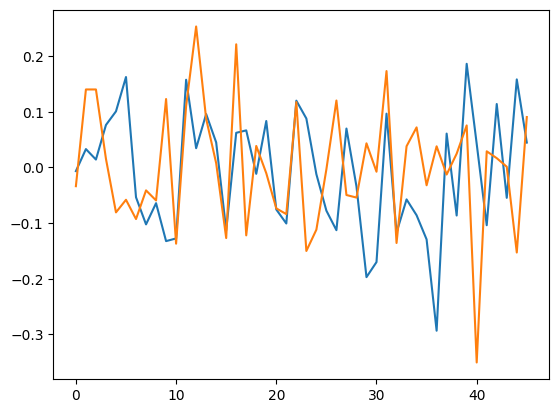

In [161]:
plt.plot(corr_stim)
plt.plot(corr_Act)

In [7]:
3e-203 +0e+00 +2e-298 +9e-106 +1e+000 +0e+00+ 0e+000+ 1e-047 

1.0